In [ ]:
pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.2 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 6.4 MB 40.4 MB/s 
     |████████████████████████████████| 3.4 MB 36.5 MB/s 
     |████████████████████████████████| 1.1 MB 41.3 MB/s 
     |████████████████████████████████| 1.2 MB 11.7 MB/s 
     |████████████████████████████████| 840 kB 45.6 MB/s 
     |████████████████████████████████| 234 kB 38.0 MB/s 
     |████████████████████████████████| 596 kB 51.0 MB/s 
     |████████████████████████████████| 120 kB 52.4 MB/s 
     |████████████████████████████████| 87 kB 6.9 MB/s 
     |████████████████████████████████| 25.3 MB 1.7 MB/s 
     |████████████████████████████████| 99 kB 8.2 MB/s 
     |████████████████████████████████| 352 kB 46.1 MB/s 
     |████████████████████████████████| 47.8 MB 64 kB/s 
     |████████████████████████████████| 462 kB 44.4 MB/s 
     |████████████████

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
image_path = "/content/drive/MyDrive/GrapeDoc_Dataset/train"
image_path = pathlib.Path(image_path)

In [ ]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 7252, num_label: 4, labels: Grape___Black_rot, Grape___Esca_(Black_Measles), Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Grape___healthy.


In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

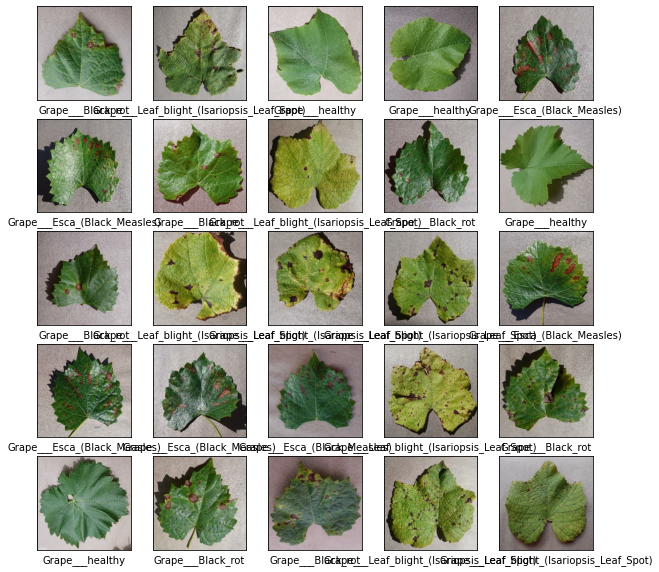

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


181/181 [==============================] - 654s 4s/step - loss: 0.5276 - accuracy: 0.9296 - val_loss: 0.4333 - val_accuracy: 0.9848
Epoch 2/5
181/181 [==============================] - 39s 214ms/step - loss: 0.4454 - accuracy: 0.9788 - val_loss: 0.4194 - val_accuracy: 0.9903
Epoch 3/5
181/181 [==============================] - 39s 216ms/step - loss: 0.4376 - accuracy: 0.9788 - val_loss: 0.4115 - val_accuracy: 0.9903
Epoch 4/5
181/181 [==============================] - 39s 216ms/step - loss: 0.4276 - accuracy: 0.9836 - val_loss: 0.4090 - val_accuracy: 0.9917
Epoch 5/5
181/181 [==============================] - 39s 217ms/step - loss: 0.4229 - accuracy: 0.9867 - val_loss: 0.4074 - val_accuracy: 0.9917


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)

23/23 [==============================] - 81s 3s/step - loss: 0.4109 - accuracy: 0.9917


In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model.export(export_dir='/content/drive/MyDrive/Test10')

INFO:tensorflow:Assets written to: /tmp/tmpeh6ni14i/assets


INFO:tensorflow:Assets written to: /tmp/tmpeh6ni14i/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp2cpv13l4/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp2cpv13l4/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Test10/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Test10/model.tflite


In [ ]:
model.export(export_dir='/content/drive/MyDrive/Test10', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /content/drive/MyDrive/Test10/labels.txt


INFO:tensorflow:Saving labels in /content/drive/MyDrive/Test10/labels.txt


In [ ]:
model.evaluate_tflite('/content/drive/MyDrive/Test10/model.tflite', test_data)

{'accuracy': 0.9917355371900827}